# Lecture 30
## Chi-Square, Student-t, Multivariate Normal
----

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, gamma, t
%matplotlib inline  

plt.xkcd()
None

## $\chi^2$ Distribution

The Chi-square Distribution is denoted as $\chi^2(n)$ or sometimes $\chi_{n}^2$, where $n$ is indicates the _degrees of freedom_. It used everywhere (I think you used it before in feature analysis). It is related to Normal distribution.

Let $V = Z_1^2 + Z_2^3 + \dots + Z_n^2$, where the $Z_j$ are i.i.d. $\mathcal{N}(0,1)$. Then by definition, $V \sim \chi^2(n)$.

You will find that in a lot of things involving statistics, the sum of squares of $\mathcal{N}(0,1)$ r.v. often pops up.

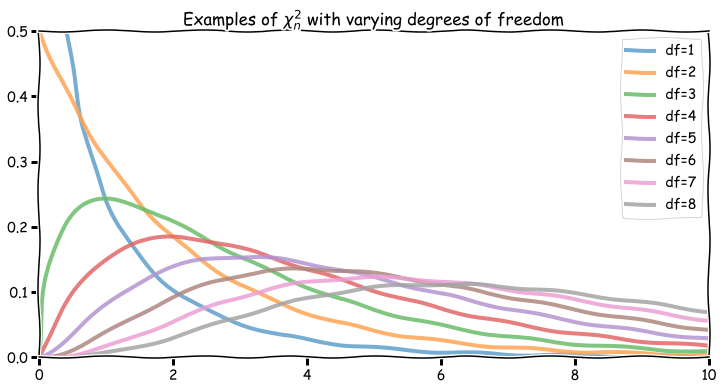

In [2]:
ddof_values = [1,2,3,4,5,6,7,8]
x = np.linspace(0, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(figsize=(12, 6))

for d in ddof_values:
    ax.plot(x, chi2.pdf(x, d), lw=4, alpha=0.6, label='df={}'.format(d))
   
plt.xlim((0,10.0))
plt.ylim((0,0.5))
plt.legend()
ax.title.set_text(r'Examples of $\chi^2_n$ with varying degrees of freedom')
plt.show()

### Fact: $\chi^2(1)$ is $Gamma(\frac{1}{2}, \frac{1}{2})$

#### Proof

Let $Y = Z^2$ where $Z \sim \mathcal{N}(0,1)$ and $y \gt 0$.

\begin{align}
    P(Y \le y) &= P(Z^2 \le y) \\
    &= P( -y^{\frac{1}{2}} \le y \le y^{\frac{1}{2}}) \\
    &= \Phi(y^{\frac{1}{2}}) - \Phi(y^{-\frac{1}{2}}) = \Phi(y^{\frac{1}{2}}) - \left( 1 - \Phi(y^{\frac{1}{2}}) \right) = 2 \, \Phi(y^{\frac{1}{2}}) - 1 \\
    \\
    \Rightarrow f_{Y}(y) &= y^{-\frac{1}{2}} \, \phi(y^{\frac{1}{2}}) \\
    &= \frac{1}{\sqrt{2\pi}} \, y^{-\frac{1}{2}} \, e^{-\frac{y}{2}} \\
    \\
    Gamma\left(\frac{1}{2}, \frac{1}{2}\right) &= \frac{1}{\Gamma(\frac{1}{2})} \, \left(\frac{y}{2}\right)^{\frac{1}{2}} \, e^{-\frac{y}{2}} \, \frac{1}{y} \\
    &= \frac{1}{\sqrt{\pi}} \, \sqrt{\frac{y}{2}} \, e^{-\frac{y}{2}} \, \frac{1}{y} \\
    &= \frac{1}{\sqrt{2\pi}} \, y^{-\frac{1}{2}} \, e^{-\frac{y}{2}} &\blacksquare \\
\end{align}

Here's a quick graph to illustrate.

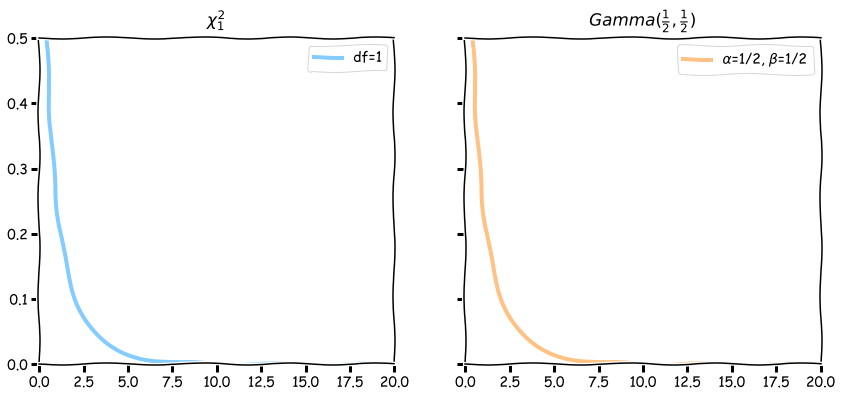

In [3]:
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,6))

x = np.linspace(0, 20, 1000)

ax1.plot(x, chi2.pdf(x, 1), lw=4, alpha=0.6, color='#33AAFF', label='df=1')
ax1.set_title('$\chi^2_1$', y=1.02)
ax1.set_xlim((0,20.0))
ax1.set_ylim((0,0.5))
ax1.legend()

# gamma.pdf API: scale = 1 / beta 
l = 0.5
ax2.plot(x, gamma.pdf(x, 0.5, scale=1/l), lw=4, alpha=0.6, color='#FF9933', label=r'$\alpha$=1/2, $\beta$=1/2')
ax2.set_title(r'$Gamma(\frac{1}{2}, \frac{1}{2})$', y=1.02)
ax2.set_xlim((0,20.0))
ax2.set_ylim((0,0.5))
ax2.legend()
None

It follows then that $\chi^2(n) = Gamma\left( \frac{n}{n}, \frac{1}{2} \right)$

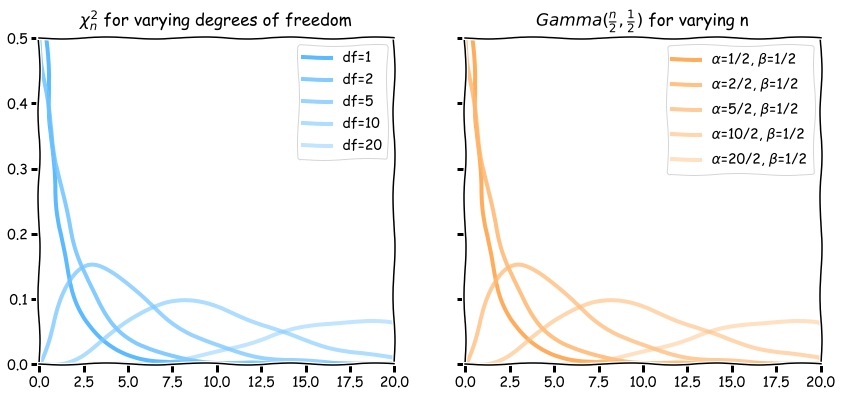

In [4]:
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,6))

x = np.linspace(0, 20, 1000)

ddof_values = [1, 2, 5, 10, 20]
col_alph_values = [0.8, 0.6, 0.5, 0.4, 0.3]

for df,c_alph in zip(ddof_values, col_alph_values):
    ax1.plot(x, chi2.pdf(x, df), color='#33AAFF', lw=4, alpha=c_alph, label='df={}'.format(df))
ax1.set_title('$\chi^2_n$ for varying degrees of freedom', y=1.02)
ax1.set_xlim((0,20.0))
ax1.set_ylim((0,0.5))
ax1.legend()

# gamma.pdf API: scale = 1 / beta 
l = 0.5
for alph,c_alph in zip(ddof_values, col_alph_values):
    ax2.plot(x, gamma.pdf(x, alph/2, scale=1/l), lw=4, alpha=c_alph, color='#FF9933', label=r'$\alpha$={}/2, $\beta$=1/2'.format(alph))
ax2.set_title(r'$Gamma(\frac{n}{2}, \frac{1}{2})$ for varying n', y=1.02)
ax2.set_xlim((0,20.0))
ax2.set_ylim((0,0.5))
ax2.legend()
None

## Student-$t$ Distribution

The Student-$t$ distribution can be described in terms of the standard normal $Z \sim N(0,1)$ and $X^2$  $V(n)$ distributions, so that means it can be entirely described in terms of the standard normal distribution.

Let $T = \frac{Z}{\sqrt{V/n}}$, with $Z \sim \mathcal{N}(0,1)$ and $V \sim \chi^2(n)$, where $Z, V$ are independent.

Then we can write $T \sim t_n$, where $n$ is the degrees of freedom.

### Properties

1. symmetric, i.e., $-T \sim t_n$
1. $n=1 \, \Rightarrow $ Cauchy, so $t_1$ does not have a mean
1. $n \ge 2 \Rightarrow \mathbb{E}(T) = \mathbb{E}(Z)\,\mathbb{E}\left(\frac{1}{\sqrt{V/n}}\right) = 0$ 
1. $t_1$ does not have a $1^{st}$ moment; $t_2$ does not have a $2^{nd}$ moment; $t_3$ does not have a $3^{rd}$ moment; and so on.
1. odd moments, if they exist, are 0

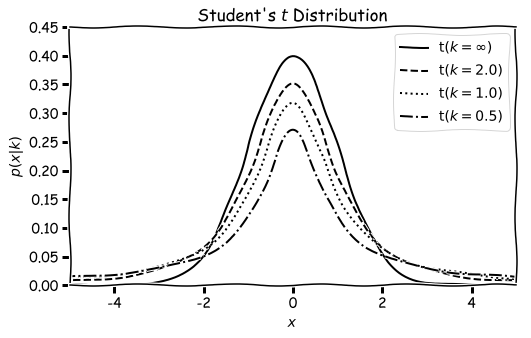

In [5]:
mu = 0
k_values = [1E10, 2, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(8, 4.75))

for k, ls in zip(k_values, linestyles):
    dist = t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    ax.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()